<a href="https://colab.research.google.com/github/cratul/Ketchup-Data/blob/main/RatulowskiProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Celine Ratulowski

I attempted to get all 16 out of 20 points for this project. This is because I only used accuracy as my metric used to evaluate my data, and I had difficulties making good visualizations.

1.**Problem:**The problem that I am trying to solve in this project is by looking at the reviews and create a model that will make an accurate prediction. The data consists of two columns, the review and the sentiment. A possible use of this kind of macine learning can be used for many classifier problems.
  
2.**Explore the Data:** From the code below, we can see that the data has 50000 samples and 2 categories. RWe can also see that the median number of words per sample is 970.0, and we have a bunch of other values that describe the data.
  
3.**Data Preparation:** In order to prepare that data I cleaned the reviews by making them all lowercase and removed any stop words.
  
4.**Metrics:** The metric that I used to evaluate my models is accuracy.
  
5.**Model Planning and Execution:** The learning algorithms that I used are perceptron, PCA, MLP, and SVC. The PCA changed number of components to 20. For the MLP i changed the parameters to hidden layer size to 100 and max iterations to 500.
  
6.**Bumps in the Road:** A challenge I encountered was making good vizualizations for my data. I tried to overcome this by looking at our previous class' lectures and assignments to look at examples. 
  
7.**Results:** After all the models were done, I found that SVC was the mest model because it had the highest accuracy of 83.07%. The MLP and Perceptron ended up with the same accuracy of 78.41%, which is alos pretty high. From the confusuin matric you can see that 1888 sentiments were predicted incorrectly, while 8112 were predicted correctly. 
  
8.**Conclusions:** Overall I would say that my SVC model turned out the best, but I would say it deoends on the data and what is trying to be solved when determining which model to use for other problems. Some of my other models could have also been improved if I played around more with tuning parameters. None of the models I created were bad in this case, and I feel like that is the case for most problems. 

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/Machine Learning/IMDB Dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



**Data Exploration:**  
Number of samples:  50000   
Number of classes of the target variable: 2   
Number of words per sample:  950   

(50000, 2)
970.0
AxesSubplot(0.125,0.125;0.775x0.755)
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review, dtype: float64


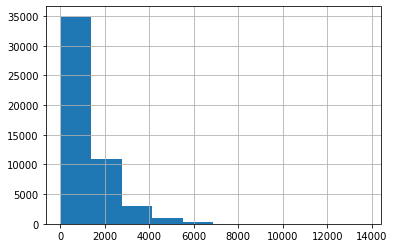

In [ ]:
## Use cells here to explore the data:
print(data.shape)
print(data['review'].apply(len).median())
print(data['review'].apply(len).hist())
print(data['review'].apply(len).describe())

AxesSubplot(0.125,0.125;0.775x0.755)


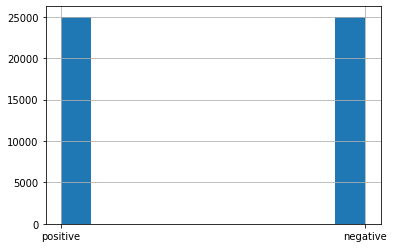

In [ ]:
print(data['sentiment'].hist())


**Data Preperation:**   
I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here.

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> dd
Command 'dd' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:

#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [ ]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))

In [ ]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [ ]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0)

**Vectorizing The Data:**   
**CountVectorizer:** Convert a collection of text documents to a matrix of token counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
extractor = PCA(n_components=20)
extractor.fit(train_data_vectors)
train_transformed =extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.27172574 0.05478849 0.04816953 0.01999903 0.01204038 0.00956216
 0.00875099 0.00783335 0.00724965 0.00632848 0.00624452 0.00612844
 0.00591654 0.00577436 0.00544275 0.00521536 0.00506931 0.00492791
 0.00464506 0.00460257]


In [ ]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

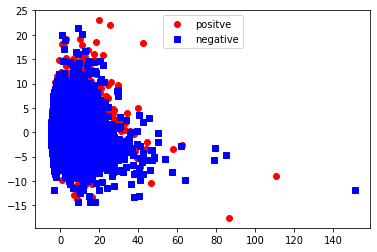

In [ ]:
#visualizing the new axes
#PCA gives it back as numpy array
tdf = pandas.DataFrame(train_transformed)
#next line: probably not the best way
tdf['sentiment'] = pandas.Series(list(train_sln)) 


setosa_series = tdf[ tdf['sentiment'] == 'positive' ]
virginica_series = tdf[ tdf['sentiment'] == 'negative' ]

plt.plot(setosa_series[0],setosa_series[1],'ro',label='positve')
plt.plot(virginica_series[0],virginica_series[1],'bs',label='negative')
plt.legend(loc='upper center')
plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
perc= Perceptron()
perc.fit(train_data_vectors, train_sln)
perc_predictions = perc.predict(test_data_vectors)
print("accuracy: ", metrics.accuracy_score(test_sln, perc_predictions))

accuracy:  0.7841


In [ ]:
#function for pretty conf matrix
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['predictPositive', 'PredictNegative'], yticklabels=['truePos', 'trueNeg']) #p for predicted, t for true
  else:
    print(cf_matrix)

accuracy:  0.7841
               Pred positive  Pred negative
True positive           4051            914
True negative            974           4061


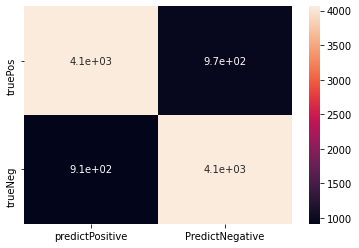

In [ ]:
#set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
mlp= MLPClassifier(random_state=0, hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(train_data_vectors, train_sln)
predictions = mlp.predict(test_data_vectors)
print("accuracy: ", metrics.accuracy_score(test_sln, perc_predictions))

print_confusion_matrix(test_sln, predictions, True)

vals = data["sentiment"].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pred " + vals))

In [ ]:
clf_SVC = SVC()
clf_SVC.fit(train_data_vectors, train_sln)
predictions=clf_SVC.predict(test_data_vectors)
print("accuracy: ", metrics.accuracy_score(test_sln, predictions))

accuracy:  0.8307
